In [1]:
from gradecc.measures import get_measures_avg

df = get_measures_avg()
df

Making gradients for subjects...


100%|██████████| 45/45 [01:12<00:00,  1.61s/it]


Making eccentricity...


100%|██████████| 134730/134730 [00:00<00:00, 741848.41it/s]


OSError: Cannot save file into a non-existent directory: '../data'

# pivot table

In [ ]:
df = df.pivot(index=['epic', 'region'], columns='measure', values='value').reset_index()
df

# plot

In [ ]:
import plotly.express as pex
import plotly.offline as pyo
pyo.init_notebook_mode()

## plot epochs in PC space

In [ ]:
my_plot = pex.scatter_3d(x='gradient1',y='gradient2',z='gradient3',
                         data_frame=df, color='epic', opacity=.7)
my_plot.update_layout(margin=dict(l=0, r=0, b=0, t=0))
my_plot.update_traces(marker_size=3)
my_plot.show()

## merge Yeo 17 networks

In [11]:
import pandas as pd

fname = 'data/Schaefer2018_1000Parcels_labels.csv'
p = pd.read_csv(fname)
p['17net'] = p.name_17networks.apply(lambda x: '_'.join(x.split('_')[2:3]))
p['position'] = p.name_17networks.apply(lambda x: '_'.join(x.split('_')[3:-1]))

In [12]:
p['17net'].unique()

array(['DorsAttnA', 'VisCent', 'DefaultC', 'VisPeri', 'ContC', 'SomMotB',
       'TempPar', 'DorsAttnB', 'SomMotA', 'ContA', 'SalVentAttnA',
       'SalVentAttnB', 'LimbicB', 'LimbicA', 'ContB', 'DefaultB',
       'DefaultA'], dtype=object)

In [13]:
p['position'].unique()

array(['TempOcc', 'ExStr', 'PHC', 'ExStrInf', 'Striate', 'StriCal', 'Rsp',
       'ExStrSup', 'ParOcc', 'SPL', 'pCun', 'Aud', '', 'Ins', 'S2',
       'Cent', 'PostC', 'FEF', 'Temp', 'IPL', 'IPS', 'PFCd', 'PFCl',
       'PrCv', 'ParOper', 'FrOper', 'PFCmp', 'FrMed', 'ParMed', 'OFC',
       'TempPole', 'PFClv', 'Cingp', 'Cingm', 'PFCv', 'PFCm', 'pCunPCC',
       'PrC', 'PFCld', 'AntTemp', 'Cinga'], dtype=object)

In [14]:
p

,index_7networks,name_7networks,x,y,z,index_17networks,name_17networks,17net,position
0,1,7Networks_LH_Vis_1,-35,-36,-24,148,17Networks_LH_DorsAttnA_TempOcc_1,DorsAttnA,TempOcc
1,2,7Networks_LH_Vis_2,-34,-51,-19,5,17Networks_LH_VisCent_ExStr_1,VisCent,ExStr
2,3,7Networks_LH_Vis_3,-25,-45,-14,151,17Networks_LH_DorsAttnA_TempOcc_4,DorsAttnA,TempOcc
3,4,7Networks_LH_Vis_4,-28,-63,-13,6,17Networks_LH_VisCent_ExStr_2,VisCent,ExStr
4,5,7Networks_LH_Vis_5,-31,-43,-9,482,17Networks_LH_DefaultC_PHC_4,DefaultC,PHC
...,...,...,...,...,...,...,...,...,...
995,996,7Networks_RH_Default_pCunPCC_16,10,-53,36,937,17Networks_RH_DefaultA_pCunPCC_12,DefaultA,pCunPCC
996,997,7Networks_RH_Default_pCunPCC_17,7,-50,44,901,17Networks_RH_ContC_pCun_6,ContC,pCun
997,998,7Networks_RH_Default_pCunPCC_18,6,-62,44,903,17Networks_RH_ContC_pCun_8,ContC,pCun
998,999,7Networks_RH_Cont_pCun_2,6,-37,39,898,17Networks_RH_ContC_pCun_3,ContC,pCun


In [15]:
df = df.merge(p, how='left', left_on='region', right_on='name_7networks')

In [16]:
df

,epic,region,eccentricity,gradient1,gradient2,gradient3,gradient4,index_7networks,name_7networks,x,y,z,index_17networks,name_17networks,17net,position
0,baseline,7Networks_LH_Cont_Cing_1,1.307186,0.884140,-0.012788,-0.107024,-0.232782,365,7Networks_LH_Cont_Cing_1,-3,18,23,269,17Networks_LH_SalVentAttnB_PFCmp_1,SalVentAttnB,PFCmp
1,baseline,7Networks_LH_Cont_Cing_2,1.141278,-0.229709,-0.348361,0.095300,0.116055,366,7Networks_LH_Cont_Cing_2,-7,-38,25,373,17Networks_LH_ContC_Cingp_2,ContC,Cingp
2,baseline,7Networks_LH_Cont_Cing_3,1.081681,-0.148199,-0.333766,0.131087,0.012671,367,7Networks_LH_Cont_Cing_3,-6,-27,27,374,17Networks_LH_ContC_Cingp_3,ContC,Cingp
3,baseline,7Networks_LH_Cont_Cing_4,1.231001,0.655240,0.070325,0.188405,-0.045482,368,7Networks_LH_Cont_Cing_4,-4,9,27,332,17Networks_LH_ContA_Cingm_1,ContA,Cingm
4,baseline,7Networks_LH_Cont_Cing_5,1.154721,-0.273036,-0.449989,-0.184444,-0.178717,369,7Networks_LH_Cont_Cing_5,-4,-13,30,375,17Networks_LH_ContC_Cingp_4,ContC,Cingp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2989,late,7Networks_RH_Vis_79,2.323528,-0.802878,1.537774,0.424215,0.281191,579,7Networks_RH_Vis_79,24,-86,38,539,17Networks_RH_VisCent_ExStr_35,VisCent,ExStr
2990,late,7Networks_RH_Vis_8,3.289347,-1.849084,2.562035,-0.381443,0.053505,508,7Networks_RH_Vis_8,27,-72,-10,509,17Networks_RH_VisCent_ExStr_5,VisCent,ExStr
2991,late,7Networks_RH_Vis_80,2.107008,-0.226178,0.861902,1.355375,0.317479,580,7Networks_RH_Vis_80,29,-77,40,677,17Networks_RH_DorsAttnA_SPL_2,DorsAttnA,SPL
2992,late,7Networks_RH_Vis_81,1.890580,-0.187411,0.406164,1.040054,0.434702,581,7Networks_RH_Vis_81,23,-81,48,678,17Networks_RH_DorsAttnA_SPL_3,DorsAttnA,SPL


## regions center of mass

In [41]:
# plot avg brain in baseline

my_plot = pex.scatter_3d(x='x', y='y', z='z',
                         data_frame=df[df.epic == 'baseline'], color='17net', opacity=.7)
my_plot.update_layout(margin=dict(l=0, r=0, b=0, t=0))
my_plot.update_traces(marker_size=3)
my_plot.show()

## plot networks in PC space

In [17]:
# plot

my_plot = pex.scatter_3d(x='gradient1', y='gradient2', z='gradient3',
                         data_frame=df[df.epic == 'baseline'], color='17net', opacity=.8)
my_plot.update_layout(margin=dict(l=0, r=0, b=0, t=0))
my_plot.update_traces(marker_size=3)
my_plot.show()

In [18]:
# plot

my_plot = pex.scatter_3d(x='gradient2', y='gradient3', z='gradient4',
                         data_frame=df[df.epic == 'baseline'], color='17net', opacity=.8)
my_plot.update_layout(margin=dict(l=0, r=0, b=0, t=0))
my_plot.update_traces(marker_size=3)
my_plot.show()

In [54]:
# plot

my_plot = pex.scatter_3d(x='gradient1', y='gradient2', z='gradient3',
                         data_frame=df[df.epic == 'baseline'], color='eccentricity', opacity=.8)
my_plot.update_layout(margin=dict(l=0, r=0, b=0, t=0))
my_plot.update_traces(marker_size=3)
my_plot.show()

In [ ]:
# would any real-world data make such structure in first PCs?

# jointplot PC 3, 4

In [7]:
from gradecc.measures import get_measures

df1 = get_measures()
df1 = df1.pivot(index=['epic', 'region', 'subject'], columns='measure', values='value').reset_index()
df1

Reading data from data/measures.csv


measure,epic,region,subject,eccentricity,gradient1,gradient2,gradient3,gradient4
0,baseline,7Networks_LH_Cont_Cing_1,1,0.973448,0.646510,0.305831,0.277519,0.599230
1,baseline,7Networks_LH_Cont_Cing_1,2,2.366376,2.057636,0.444419,-0.976807,0.462827
2,baseline,7Networks_LH_Cont_Cing_1,3,1.622717,1.367534,-0.111802,-0.138282,-0.855244
3,baseline,7Networks_LH_Cont_Cing_1,4,1.646541,1.165754,0.052698,-0.487611,-1.054311
4,baseline,7Networks_LH_Cont_Cing_1,5,1.586136,-0.146776,-0.238125,1.555876,-0.129723
...,...,...,...,...,...,...,...,...
134725,late,7Networks_RH_Vis_9,42,3.153262,-1.857873,2.456813,-0.655765,0.159405
134726,late,7Networks_RH_Vis_9,43,2.976993,-1.702982,2.378048,-0.532770,0.152905
134727,late,7Networks_RH_Vis_9,44,3.807641,-2.195933,3.072538,-0.450956,0.179330
134728,late,7Networks_RH_Vis_9,45,2.577547,-1.249256,2.199128,-0.075542,-0.491158


In [19]:
import seaborn as sns

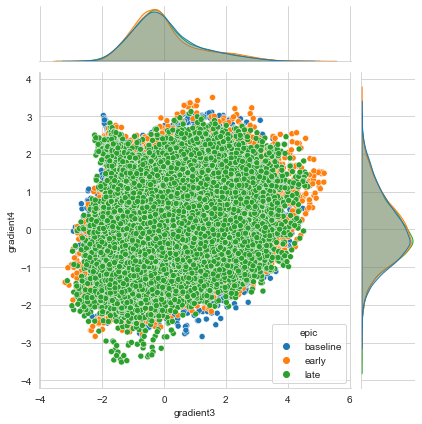

In [22]:
sns.jointplot(x='gradient3', y='gradient4', data=df1, hue='epic')

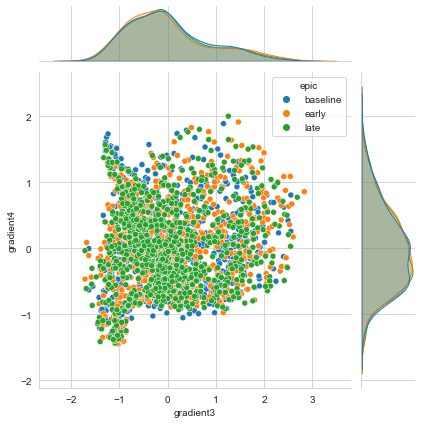

In [24]:
sns.jointplot(x='gradient3', y='gradient4', hue='epic', data=df)